In [1]:
from PYME.localization.FitFactories import DumbellFitR as dbfr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
roiHalfSize = 10 # [pixels]

xx = np.mgrid[(-roiHalfSize):(roiHalfSize + 1)]
yy = np.mgrid[(-roiHalfSize):(roiHalfSize + 1)]

# A, x0, y0, B, x1, y1, s, bg = p
amp1, amp2 = 100., 100.
b = 10
sigma = 1
half_length = 1.5 * sigma
x0, y0 = 1 -half_length, 1 -half_length
x1, y1 = 1 + half_length, 1 + half_length

p = amp1, x0, y0, amp2, x1, y1, sigma, b
A, x0, y0, B, x1, y1, s, bg = p  # translate to David's
X, Y = xx[:, None], yy[None, :]
# r = A*np.exp(-((X-x0)**2 + (Y - y0)**2)/(2*s**2)) + B*np.exp(-((X-x1)**2 + (Y - y1)**2)/(2*s**2)) + bg 


model_dumbell = dbfr.f_dumbell(p, xx, yy)

In [3]:
print([model_dumbell.min(), model_dumbell.max()])

[10.0, 88.07312372076326]


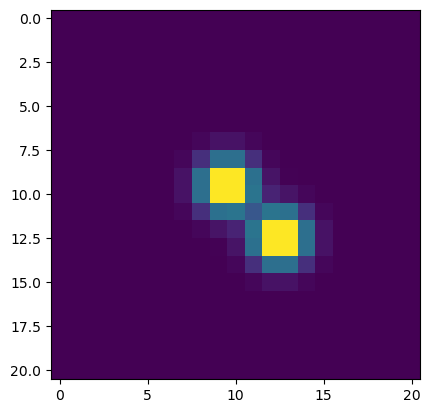

In [4]:
plt.figure()
plt.imshow(model_dumbell)
plt.show()

In [5]:
# def k1(theta):
#     thetaj = 0
#     return (1/3) * (1 + 2 * np.cos(2 * (theta - thetaj)))
# def k2(theta):
#     thetaj = 60 * np.pi / 180
#     return (1/3) * (1 + 2 * np.cos(2 * (theta - thetaj)))
# def k3(theta):
#     thetaj = 120 * np.pi / 180
#     return (1/3) * (1 + 2 * np.cos(2 * (theta - thetaj)))
# def G2_1(x, y):
#     # 0 degrees
#     return (4 * x**2 - 2) * np.exp( - (x ** 2 + y ** 2))
# def G2_2(x, y):
#     # 60 degrees
#     return
# def G2_3(x, y):
#     # 120 degrees
#     return

In [6]:
# see pg 39, http://robots.stanford.edu/cs223b04/SteerableFiltersfreeman91design.pdf

def ka(theta):
    return np.cos(theta)**2
def kb(theta):
    return -2 * np.cos(theta) * np.sin(theta)
def kc(theta):
    return np.sin(theta)**2

def g2a(x, y):
    return 0.9213 * (2 * x**2 - 1) * np.exp(- (x**2 + y**2))

def g2b(x, y):
    return 1.843*x*y*np.exp(- (x**2 + y**2))

def g2c(x, y):
    return 0.9213 * (2 * y**2 - 1) * np.exp(- (x**2 + y**2))


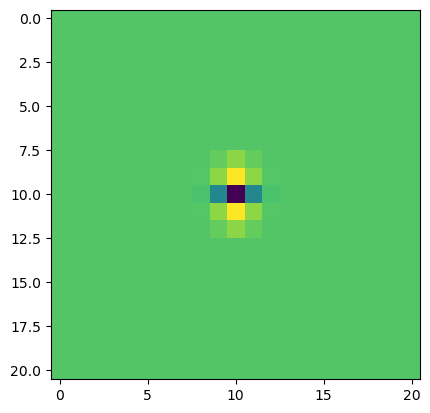

In [7]:
f1 = g2a(X, Y)
plt.imshow(f1)

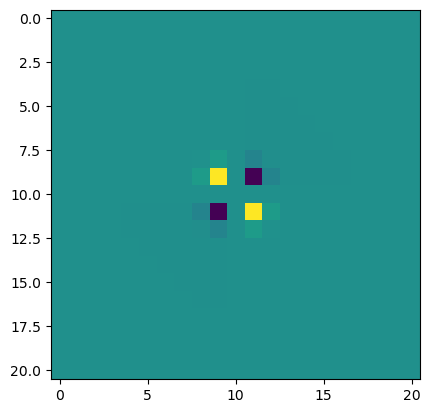

In [8]:
f2 = g2b(X, Y)
plt.imshow(f2)

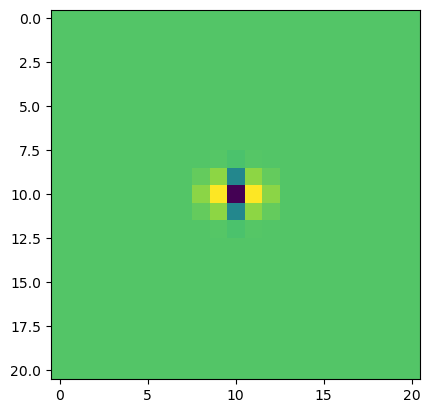

In [9]:
f3 = g2c(X, Y)
plt.imshow(f3)

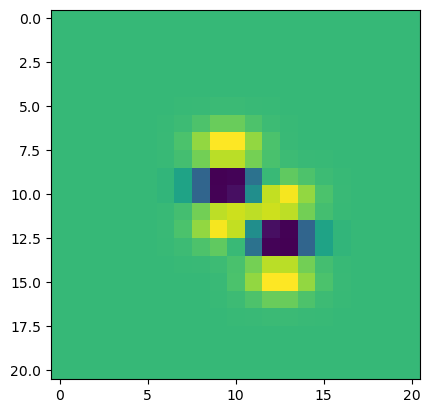

In [10]:
from scipy import ndimage
c1 = ndimage.convolve(model_dumbell, f1)
plt.figure()
plt.imshow(c1)

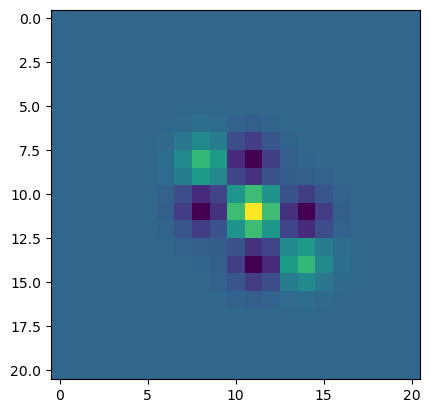

In [11]:
c2 = ndimage.convolve(model_dumbell, f2)
plt.figure()
plt.imshow(c2)

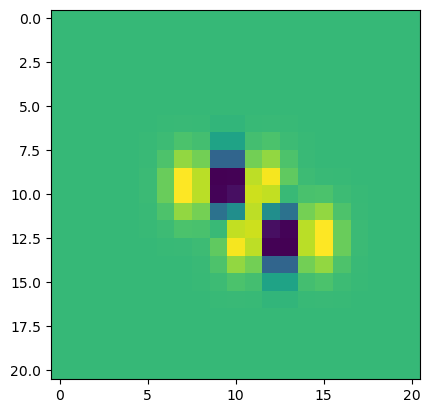

In [12]:
c3 = ndimage.convolve(model_dumbell, f3)
plt.figure()
plt.imshow(c3)

In [13]:
# separatable basis set and interpolation functions for fit to hilbert transform of second derivative of gaussian
def h2a(x, y):
    return 0.9780  * (-2.254 * x + x ** 3) * np.exp( - (x**2 + y**2))
def h2b(x, y):
    return 0.9780 * (-0.7515 + x ** 2) * y * np.exp( - (x**2 + y**2))
def h2c(x, y):
    return 0.9780 * (-0.7515 + y ** 2) * x * np.exp( - (x**2 + y**2))
def h2d(x, y):
    return 0.9780  * (-2.254 * y + y ** 3) * np.exp( - (x**2 + y**2))

def kha(theta):
    return np.cos(theta)**3
def khb(theta):
    return - 3 * np.cos(theta)**2 * np.sin(theta)
def khc(theta):
    return 3 * np.cos(theta) * np.sin(theta) ** 2
def khd(theta):
    return - np.sin(theta)**3

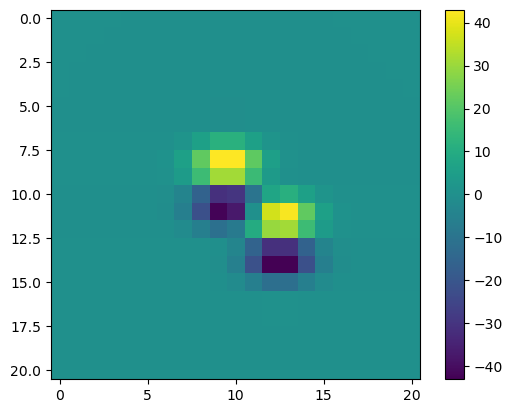

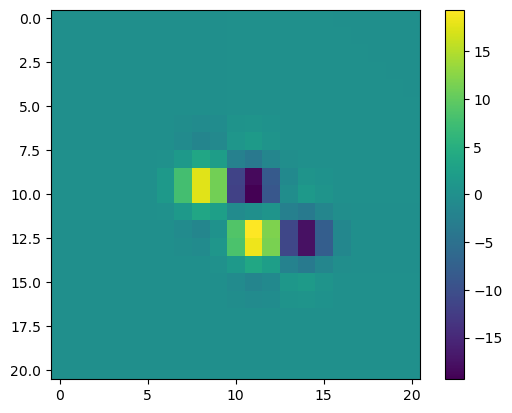

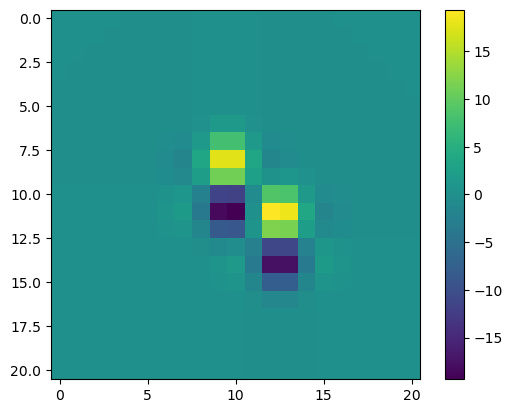

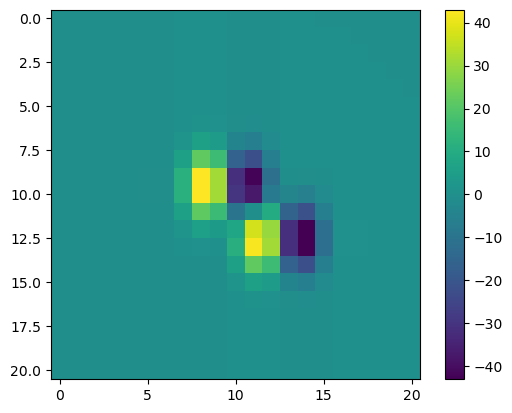

In [14]:
fha = h2a(X, Y)
cha = ndimage.convolve(model_dumbell, fha)
plt.figure()
plt.imshow(cha)
plt.colorbar()
plt.show()

fhb = h2b(X, Y)
chb = ndimage.convolve(model_dumbell, fhb)
plt.figure()
plt.imshow(chb)
plt.colorbar()
plt.show()

fhc = h2c(X, Y)
chc = ndimage.convolve(model_dumbell, fhc)
plt.figure()
plt.imshow(chc)
plt.colorbar()
plt.show()

fhd = h2d(X, Y)
chd = ndimage.convolve(model_dumbell, fhd)
plt.figure()
plt.imshow(chd)
plt.colorbar()
plt.show()


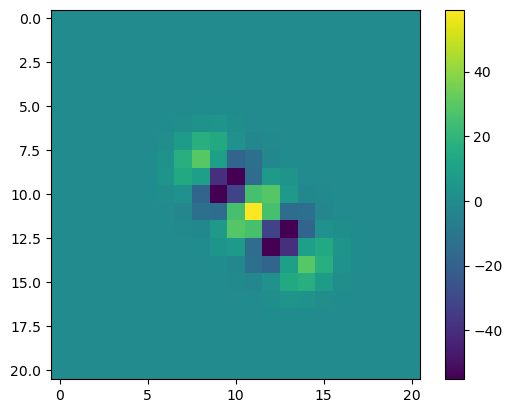

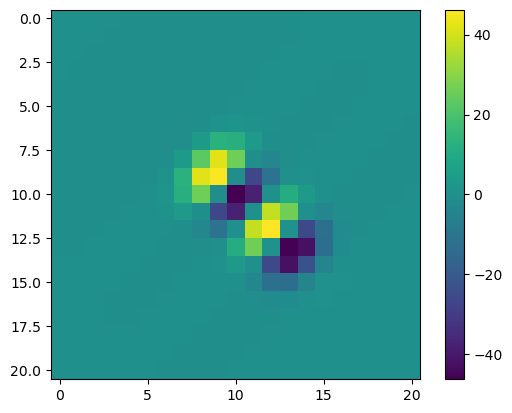

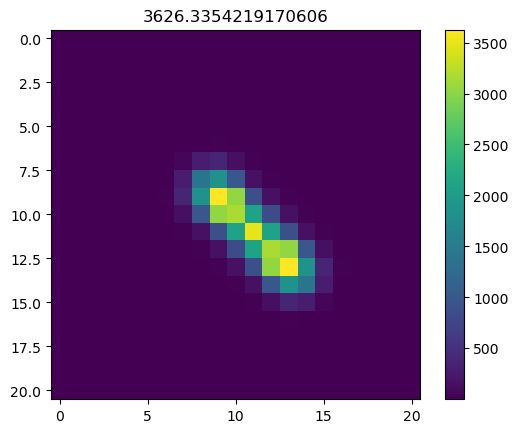

In [15]:
# can now reconstruct a filtered image at any theta
theta = -45 * np.pi/180
g_2_theta = (ka(theta) * c1 + kb(theta) * c2 + kc(theta) * c3)
plt.figure()
plt.imshow(g_2_theta)
plt.colorbar()
# and for the fitted approximation to a hilbert transform of G2
h_2_theta = (kha(theta) * cha + khb(theta) * chb + khc(theta) * chc + khd(theta) * chd)
plt.figure()
plt.imshow(h_2_theta)
plt.colorbar()

# quadrature energy
e_2_theta = g_2_theta ** 2 + h_2_theta ** 2
plt.figure()
plt.imshow(e_2_theta)
plt.title(e_2_theta.max())
plt.colorbar()

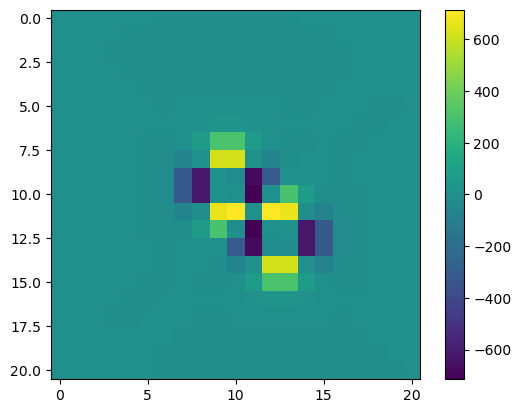

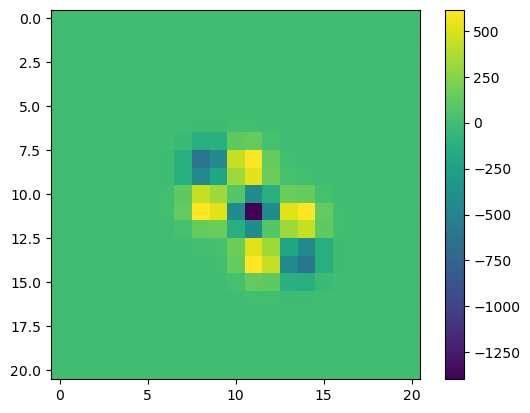

In [16]:
g2a_xy = ndimage.convolve(model_dumbell, g2a(X, Y))
g2b_xy = ndimage.convolve(model_dumbell, g2b(X, Y))
g2c_xy = ndimage.convolve(model_dumbell, g2c(X, Y))

h2a_xy = ndimage.convolve(model_dumbell, h2a(X, Y))
h2b_xy = ndimage.convolve(model_dumbell, h2b(X, Y))
h2c_xy = ndimage.convolve(model_dumbell, h2c(X, Y))
h2d_xy = ndimage.convolve(model_dumbell, h2d(X, Y))

c_2= 0.5 * (g2a_xy**2 - g2c_xy**2) \
            + 0.46875*(h2a_xy**2 - h2d_xy**2) \
            + 0.28125*(h2b_xy**2 - h2c_xy**2) \
            + 0.1875 * (h2a_xy*h2c_xy - h2b_xy * h2d_xy)
c_3 = - g2a_xy*g2b_xy - g2b_xy * g2c_xy \
            - 0.9375 * (h2c_xy * h2d_xy + h2a_xy * h2b_xy) \
            - 1.6875 * h2b_xy * h2c_xy - 0.1875 * h2a_xy * h2d_xy

plt.figure()
plt.imshow(c_2)
plt.colorbar()

plt.figure()
plt.imshow(c_3)
plt.colorbar()

In [17]:
# def c_2(x, y):
#     return 0.5 * (g2a(x, y)**2 - g2c(x, y)**2) \
#             + 0.46875*(h2a(x, y)**2 - h2d(x, y)**2) \
#             + 0.28125*(h2b(x, y)**2 - h2c(x, y)**2) \
#             + 0.1875 * (h2a(x, y)*h2c(x, y) - h2b(x, y) * h2d(x, y))
# def c_3(x, y):
#     return - g2a(x, y)*g2b(x, y) - g2b(x, y) * g2c(x, y) \
#             - 0.9375 * (h2c(x, y) * h2d(x, y) + h2a(x, y) * h2b(x, y)) \
#             - 1.6875 * h2b(x, y) * h2c(x, y) - 0.1875 * h2a(x, y) * h2d(x, y)

# plt.figure()
# plt.imshow(c_2(X, Y))
# plt.colorbar()

# plt.figure()
# plt.imshow(c_3(X, Y))
# plt.colorbar()

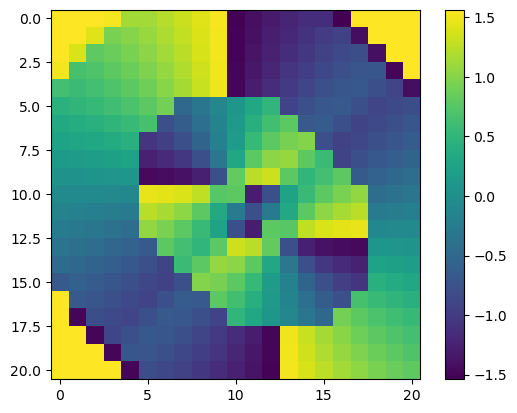

In [18]:
def theta_d(c_2, c_3):
    # note reversal of x, y for arg in numpy
    ret = np.arctan2(c_3, c_2) / 2
    return ret

plt.figure()
plt.imshow(theta_d(c_2, c_3))
plt.colorbar()
plt.show()

In [19]:
theta_d(c_2, c_3)[11, 11]

-0.7853981633974483

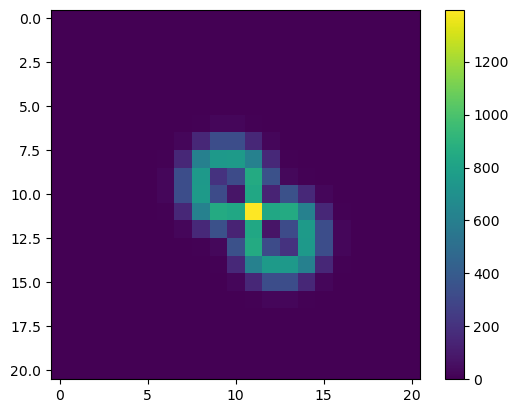

In [20]:
def s(c_2, c_3):
    return np.sqrt(c_2 ** 2 + c_3 ** 2)
plt.figure()
plt.imshow(s(c_2, c_3))
plt.colorbar()
plt.show()

In [21]:
np.pi / 4

0.7853981633974483

In [22]:
s(c_2, c_3)[11, 11]

1396.4692713701095